<h1 align="center">UST, Zewail City</h1>
<h2 align="center">CIE 555 (Spring 2021)</h2>
<h2 align="center">Lab 1: Neural Network Implementation </h2>
<h3 align="center">Aya Elzahy</h3>

This notebook is based on Udacity Deep Learning Nanodegree 

https://github.com/udacity/deep-learning-v2-pytorch/tree/master/project-bikesharing 

#Lab objectives

In this lab, you will learn how to build the basic operations of a typical neural network from scratch. Network will be trained and validated using a synthetic regression dataset that we generate as part of this exercise. Learning objectives are:

*   Understand the computational model of a neuron
*   Implement the basic operations of a typical neural network.
*   Understand the notion of backpropagation and how it is used to train neural networks.







#Import statements 

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
import sys
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
random.seed(10)

#Synthesize data

In this step, we generate synthetic regression data that has 200 samples and 2 features. Our neural network model will be trained and tested using this data.

To use the data in our modelling exercise, we need to scale the data to have a zero mean and unit standard deviation. Scaling the data is a typical practice in neural networks' modelling to make the learning process stable. 

In [ ]:
x_data,y_data = make_regression(n_samples=200, n_features=2)

train_features,val_features, train_targets,val_targets=train_test_split(x_data,y_data,test_size=0.2)

#Fitting the scaler to training data only to prevent data leakage
feature_scaler= StandardScaler().fit(train_features)
train_features= feature_scaler.transform(train_features)
val_features= feature_scaler.transform(val_features)

target_scaler= StandardScaler().fit(train_targets.reshape(-1, 1))
train_targets=target_scaler.transform(train_targets.reshape(-1, 1))
val_targets=target_scaler.transform(val_targets.reshape(-1, 1))

In [ ]:
print(train_features.shape)
print(val_features.shape)

(160, 2)
(40, 2)


#Build a neural network

In this task, will write the basic functions of a typical neural network. The network we use in this exercise has the following architecture: 
* Two input nodes corresponding to the 2 input features.
* Three hidden nodes in the hidden layer. All nodes in the hidden layer use ReLU activation. 'hi' is the input to the hidden layer that is the sum of w0 multiplied by the input nodes in the forward pass step. 'ho' is the output of the hidden nodes that equals to ReLU (hi). 
* One output node corresponding to the target variable in the dataset. This node doesn't use any non-linear activations. The input to the node (oi) is the sum of ho multiplied by the weights w1. The output of the node (oo) equals the input of the node(oi). 


An illustrative diagram of the network is shown below. The diagram is labeled with suggested variable names. We recommend you stick to these variable names while writing the code to avoid confusion.

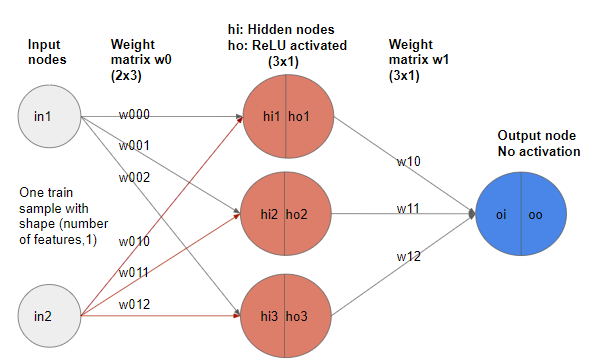




 When training the network, as you will see in the upcoming section, weights will be randomly initialized using a normal distribution. The network will be trained for a certain number of iterations that you specify as a hyperparameter. In each iteration we loop over the training samples performing forward and backward operations. Netowrk is optimized using a  batch gradient descent technique. That is, we use the average delta_weight_ih and delta_weight_h_o, calcualted using all training samples, to update the weights.

 Your task is to build these basic operations that will be used later in the model training.

  1. Forward pass: you'll calculate the values of hi,ho,oi,oo in the function ***forward_pass*** [Task 1] and return the hidden outputs (ho) and final outputs (oo). You'll need to implement the activation in the dunction ***relu*** [Task 2] to use it for activating the input to the hidden units.
  2. Backpropagation: You'll implement ***backpropagation*** function [Task 3] to calculate the change in weights from input to hidden layers (delta_weights_i_h) and change in weights from hidden to output layers (delta_weights_h_o). You'll need to implement ReLU derivative in the function **relu_deriv** [Task 4] to use it in backpropagation. You'll also need to implement the mean square error loss function (***MSE***) [Task 5]    



In [ ]:
def relu (x): # x is (1x3)
  #TODO: Implement the ReLU function here [1 mark]
  return np.maximum(0,x) 
             
def relu_deriv (x): 
  #TODO: Implement a function to return the derivative of the ReLU function (Choose any of the 2 intervals for the value of zero) [1 mark]
  return 1 * (x > 0)

def MSE(y, Y):
  #TODO: Implement mean square error loss function [1 mark]
    return np.sum((Y-y)**2)/len(y)

In [ ]:
def forward_pass(X,w0,w1):
        ''' Implement the forward pass of the two-layer network shown above.  [3 marks]
         
            Arguments
            ---------
            X: feature sample with shape (2x1)
            return the final output (oo) and hidden output(ho) as per the diagram
         '''
        ### Forward pass ###
        # TODO: Hidden layer
        hi = np.dot(X.reshape(-1,2), w0)         #input to hidden layer [(1x2).(2x3) --> (1x3)]
        ho = relu(hi)                            #output from hidden layer

        # TODO: Output layer 
        oi = np.dot(ho, w1)         #input to final output layer
        oo = oi         #output from final output layer with no activation 
        
        return oo, ho

In [ ]:
def backpropagation(oo, ho, X, y, delta_weights_i_h, delta_weights_h_o):
        ''' Implement the backward pass of the network shown above [4 marks]
         
            Arguments
            ---------
            oo: the final output of the network produced by the forward pass 
            ho: output the hidden layer of the network produced by produced by the forward pass function 
            X: feature sample with shape (2x1)
            y: target label
            delta_weights_i_h: change in weights from input to hidden layers
            delta_weights_h_o: change in weights from hidden to output layers
            
            delta_weights_i_h and delta_weights_h_o accumlate the change values due to every single example. 
            In the training part at the end of the notebook, at the end of every iteration, we use these delta values to
            update the weights(weights+=learning rate*delta_weights/number of training samples),
            so don't update the weights in this function. just return the delta values. 
        '''

        # TODO: Output error- Output layer error is the difference between desired target and actual output (target-output)
        error =  y - oo
        
        # TODO: Weight step (hidden to output)
        # derivative of error with respect to w1
        partial_oo_oi = 1
        partial_oi_w = ho
        delta_weights_h_o += (error * partial_oo_oi * partial_oi_w).reshape(3, 1)
        
        # TODO: Weight step (input to hidden)
        # derivative of error with respect to w0
        partial_ho_hi = relu_deriv(ho)    # (3x1)
        partial_hi_wo = X                 # (2x1)
        delta_weights_i_h += (error * partial_ho_hi.transpose() * partial_hi_wo).transpose()
        
        return delta_weights_i_h, delta_weights_h_o

#Training the network

In this step, we will use the synthetic data that we generated earlier to train and test a neural network using the 'forward_pass' and 'backpropagation' functions you wrote earlier. As mentioned previously, weights will be randomly initialized using a normal distribution and they are updated using batch gradient descent. You don't have to change anything in the following cells. PLease run the code and check how the loss function is changing in each iteration.

In [ ]:
iterations = 400  #You can change the number of iterations for better results 
lr = 0.2         #You can change the learning rate for better results 
hidden_nodes = 3 #Don't change
output_nodes = 1 #Don't change 
input_nodes= train_features.shape[1] #Don't change
n_records = train_features.shape[0]  #Don't change


# Initialize weights
#Weights are initialized randomly from a normal distribution
w0 = np.random.normal(size= (input_nodes, hidden_nodes))  #Weights input to hidden

w1 = np.random.normal(size= (hidden_nodes, output_nodes)) #weights hidden to output

losses = {'train':[], 'validation':[]}
for i in range(iterations):
    delta_weights_i_h = np.zeros(w0.shape)
    delta_weights_h_o = np.zeros(w1.shape)
    for X, y in zip(train_features, train_targets):
      oo, ho = forward_pass(X,w0,w1)  # Implement the forward pass function below  
      delta_weights_i_h, delta_weights_h_o = backpropagation(oo, ho, X, y, delta_weights_i_h, delta_weights_h_o)

    w1 += lr*delta_weights_h_o/n_records # update hidden-to-output weights with gradient descent step
    w0 += lr*delta_weights_i_h/n_records # update input-to-hidden weights with gradient descent step

    train_loss = MSE(forward_pass(train_features,w0,w1)[0], train_targets)
    val_loss = MSE(forward_pass(val_features,w0,w1)[0], val_targets)
    print("Iteration: ", i, "...Training loss: ", round(train_loss,5), "...Validation loss: ",  round(val_loss,5))    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)


Iteration:  0 ...Training loss:  2.33074 ...Validation loss:  3.10501
Iteration:  1 ...Training loss:  3.09123 ...Validation loss:  4.23162
Iteration:  2 ...Training loss:  3.99442 ...Validation loss:  5.53334
Iteration:  3 ...Training loss:  4.75293 ...Validation loss:  6.59634
Iteration:  4 ...Training loss:  4.78048 ...Validation loss:  6.55865
Iteration:  5 ...Training loss:  3.55285 ...Validation loss:  4.77528
Iteration:  6 ...Training loss:  1.86067 ...Validation loss:  2.35688
Iteration:  7 ...Training loss:  0.91257 ...Validation loss:  1.02067
Iteration:  8 ...Training loss:  0.65632 ...Validation loss:  0.68539
Iteration:  9 ...Training loss:  0.59274 ...Validation loss:  0.62676
Iteration:  10 ...Training loss:  0.56443 ...Validation loss:  0.61049
Iteration:  11 ...Training loss:  0.54882 ...Validation loss:  0.6031
Iteration:  12 ...Training loss:  0.53889 ...Validation loss:  0.59849
Iteration:  13 ...Training loss:  0.53266 ...Validation loss:  0.59557
Iteration:  14 ..

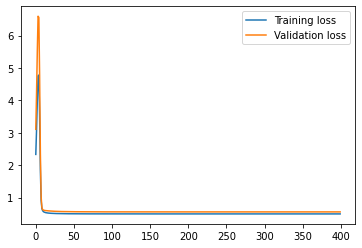

In [ ]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()